In [1]:
from google.colab import files
uploaded = files.upload()

Saving crimes_against_women_2001-2014.csv to crimes_against_women_2001-2014.csv


In [4]:
import io
import pandas as pd


crimes_df = pd.read_csv(io.BytesIO(uploaded['crimes_against_women_2001-2014.csv']))



In [5]:
crimes_df


,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [6]:
crimes_df.shape


(10677, 11)

**Data Preparation and Cleaning**
To start with the very basic of data cleaning, let's find out if any of the columns have any Null or missing values


In [7]:
overall_crime = crimes_df.isna().sum()
overall_crime


Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [9]:
districts = len(crimes_df.DISTRICT.unique())
districts


1605

In [10]:
crimes_df.drop(['DISTRICT', 'Unnamed: 0'], axis = 1, inplace=True)
crimes_df.rename( columns = {'Kidnapping and Abduction':'Kidnapping_Abduction','Dowry Deaths':'Dowry_Deaths',
                             'Assault on women with intent to outrage her modesty':'Hurting_of_womens_modesty',
                             'Insult to modesty of Women':'Insult_to_womens_modesty',
                             'Cruelty by Husband or his Relatives':'Domestic_Cruelty',
                             'Importation of Girls':'Importation_of_Girls'}, inplace = True)
crimes_df

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,2014,1,0,0,1,2,0,0
10674,Puducherry,2014,3,1,0,12,1,1,0
10675,Puducherry,2014,7,6,1,20,7,3,0


In [11]:
print(crimes_df['STATE/UT'].unique())


['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry' 'Telangana'
 'A & N Islands']


In [12]:
def remove_uppercase(r):
    r = r['STATE/UT'].strip()
    r = r.upper()
    return r
crimes_df['STATE/UT'] = crimes_df.apply(remove_uppercase, axis=1)

#Now use replace function to replace the other type of repeated datas as dicussed above
crimes_df['STATE/UT'].replace("A&N ISLANDS", "A & N ISLANDS", inplace = True)
crimes_df['STATE/UT'].replace("D&N HAVELI", "D & N HAVELI", inplace = True)
crimes_df['STATE/UT'].replace("DELHI UT", "DELHI", inplace = True)


In [13]:
crimes_df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA'],
      dtype=object)

**Now check the total number of States+UT**

In [14]:
len(crimes_df['STATE/UT'].unique())

36

**Exploratory Analysis and Visualization**


Let us find out the total population of women over the years, 2001-2014, who has been a victim of the crime based on their gender.


In [15]:
victims_raped = crimes_df.Rape.sum()
victims_kidnapped_abducted = crimes_df.Kidnapping_Abduction.sum()
dowery_death = crimes_df.Dowry_Deaths.sum()
modesty_assault = crimes_df.Hurting_of_womens_modesty.sum()
insult_to_modesty = crimes_df.Insult_to_womens_modesty.sum()
domestic_violence = crimes_df.Domestic_Cruelty.sum()
girls_imported = crimes_df.Importation_of_Girls.sum()

In [16]:
total_population_of_victim_overall = victims_raped + victims_raped + dowery_death +modesty_assault+ insult_to_modesty + domestic_violence+ girls_imported
total_population_of_victim_overall

5194570

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Cases ofImportation of girls in India')

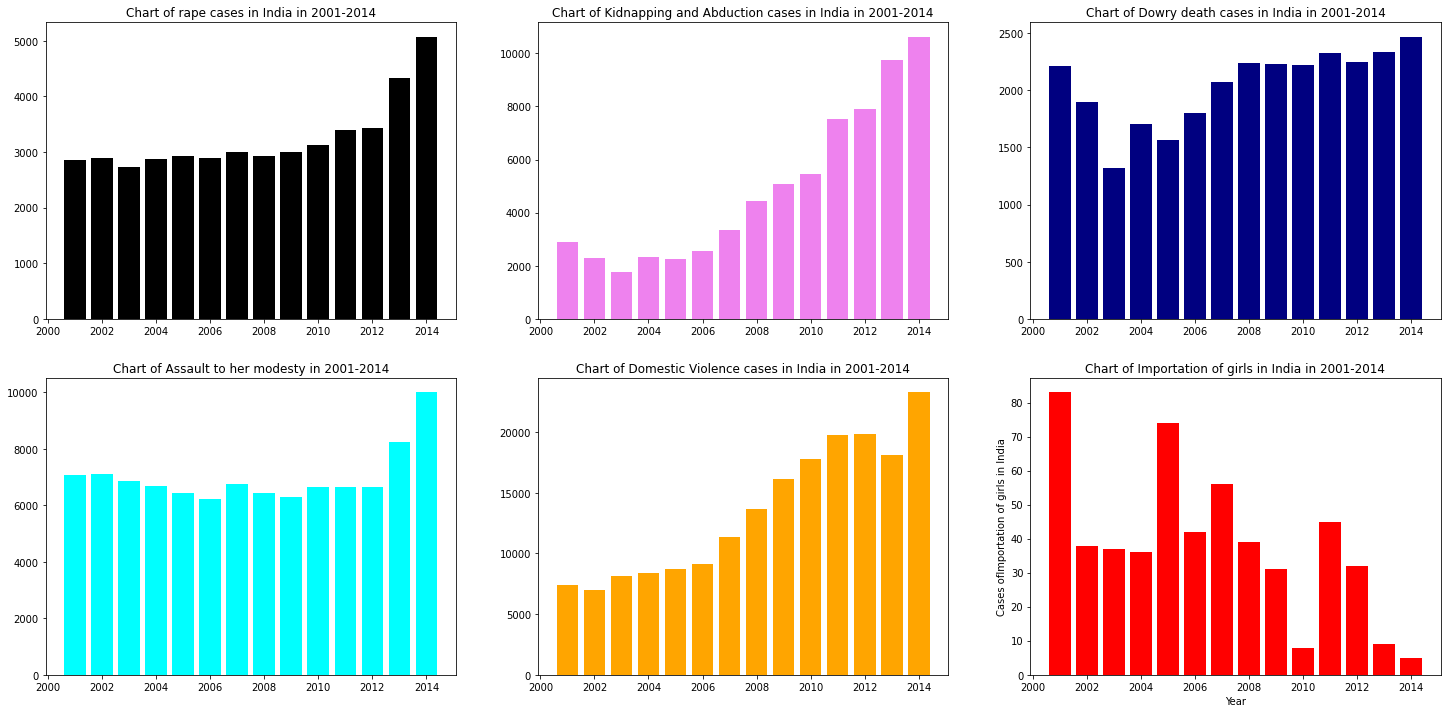

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(25, 12))

axes[0,0].set_title("Chart of rape cases in India in 2001-2014")
axes[0,0].bar(crimes_df.Year, crimes_df.Rape, color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Rape in India') #Y-axis

axes[0,1].set_title("Chart of Kidnapping and Abduction cases in India in 2001-2014")
axes[0,1].bar(crimes_df.Year, crimes_df.Kidnapping_Abduction, color = 'violet');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Kidnapping and Abduction in India') #Y-axis

axes[0,2].set_title("Chart of Dowry death cases in India in 2001-2014")
axes[0,2].bar(crimes_df.Year, crimes_df.Dowry_Deaths, color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Dowry deaths in India') #Y-axis

axes[1,0].set_title("Chart of Assault to her modesty in 2001-2014")
axes[1,0].bar(crimes_df.Year, crimes_df.Hurting_of_womens_modesty, color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Assaulting a women for her modesty in India') #Y-axis

axes[1,1].set_title("Chart of Domestic Violence cases in India in 2001-2014")
axes[1,1].bar(crimes_df.Year, crimes_df.Domestic_Cruelty, color = 'orange');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Domestic Violence in India') #Y-axis

axes[1,2].set_title("Chart of Importation of girls in India in 2001-2014")
axes[1,2].bar(crimes_df.Year, crimes_df.Importation_of_Girls, color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases ofImportation of girls in India') #Y-axis

**There are two things to be concluded from the above bar chart -**
1) The cases have incraesed over the years.
2) 2014 has been the year, where violance against women was reported the maximum, under each of the cases like, rape, domestic violence etc, which can also be proved below, which can also be cross examined with the code below.

In [19]:
count_df = crimes_df.groupby('Year')[['STATE/UT']].count()
count_df



,STATE/UT
Year,
2001,716
2002,719
2003,728
2004,729
2005,733
2006,740
2007,743
2008,761
2009,767


# Let us use seaborn to take help of heatmap to represent how more cases from each state started coming up more frequently with each passing year.

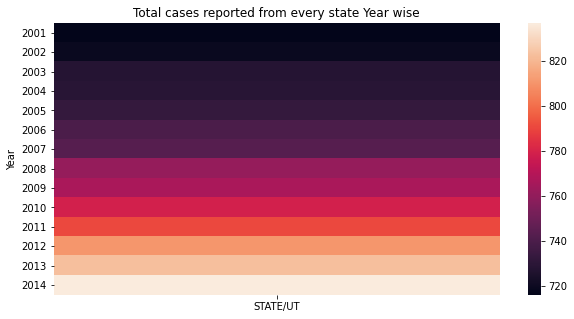

In [20]:
plt.figure(figsize=(10,5))
plt.title("Total cases reported from every state Year wise")
sns.heatmap(count_df);


**Crime is increasing with year**


# **Conclusion and Analysis **

In [21]:
crimes_df = crimes_df.drop(['Hurting_of_womens_modesty', 'Insult_to_womens_modesty'], axis=1)

**Q . Create a dataframe containing 10 highest reported rape cases in India, in the span of year 2001-2014.**

In [22]:
max_rape_cases = crimes_df.sort_values('Rape', ascending = False).head(10)
max_rape_cases

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
10244,MADHYA PRADESH,2014,5076,5688,733,6451,0
9426,MADHYA PRADESH,2013,4335,2873,776,4988,7
10445,RAJASTHAN,2014,3759,4421,408,15905,0
10595,UTTAR PRADESH,2014,3467,10626,2469,10471,0
10291,MAHARASHTRA,2014,3438,2457,279,7696,1
8611,MADHYA PRADESH,2012,3425,1127,743,3988,6
7810,MADHYA PRADESH,2011,3406,1088,811,3732,45
9628,RAJASTHAN,2013,3285,4047,453,15094,1
7025,MADHYA PRADESH,2010,3135,1030,892,3756,5
9472,MAHARASHTRA,2013,3063,1874,320,8542,0


**Q. Create a dataframe containing 10 highest reported Domestic Violance cases in India, in the span of year 2001-2014.**

In [23]:
max_domestic_violance_cases = crimes_df.sort_values('Domestic_Cruelty', ascending = False).head(10)
max_domestic_violance_cases

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
10640,WEST BENGAL,2014,1466,4976,501,23278,4
8982,WEST BENGAL,2012,2046,4168,593,19865,12
8172,WEST BENGAL,2011,2363,3711,510,19772,0
9804,WEST BENGAL,2013,1685,3830,481,18116,9
7381,WEST BENGAL,2010,2311,2764,507,17796,8
6602,WEST BENGAL,2009,2336,2187,506,16112,5
10445,RAJASTHAN,2014,3759,4421,408,15905,0
9628,RAJASTHAN,2013,3285,4047,453,15094,1
9050,ANDHRA PRADESH,2013,1635,1595,492,15084,0
5835,WEST BENGAL,2008,2263,1907,451,13663,5


*Q. Create a dataframe containing 10 highest reported Importation cases in India, in the span of year 2001-2014.**

In [24]:
max_importation_case = crimes_df.sort_values('Importation_of_Girls', ascending = False).head(10)
max_importation_case

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
115,BIHAR,2001,888,518,859,1558,83
3013,BIHAR,2005,1147,929,1014,1574,74
3597,WEST BENGAL,2005,1686,1039,446,6936,61
3590,WEST BENGAL,2005,148,97,48,545,60
4486,BIHAR,2007,1555,1260,1172,1635,56
3005,BIHAR,2005,28,4,40,73,48
7810,MADHYA PRADESH,2011,3406,1088,811,3732,45
3746,BIHAR,2006,1232,1084,1188,1689,42
102,BIHAR,2001,27,11,90,152,39
5378,JHARKHAND,2008,791,499,266,851,39


**Q. Find out the total number of cases, in span of 2001-2014 under each category, state wise.**

In [25]:
counts_df = crimes_df.groupby('STATE/UT')[['Rape', 'Kidnapping_Abduction', 'Dowry_Deaths','Domestic_Cruelty', 'Importation_of_Girls']].sum()
counts_df

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
STATE/UT,,,,,
A & N ISLANDS,336,212,20,288,0
ANDHRA PRADESH,32150,34504,13844,280906,34
ARUNACHAL PRADESH,1316,1470,6,476,0
ASSAM,40190,62074,3268,115300,22
BIHAR,30758,57086,32206,69770,904
CHANDIGARH,770,1682,90,2080,0
CHHATTISGARH,29308,11808,2758,23436,12
D & N HAVELI,132,224,2,90,0
DAMAN & DIU,60,44,6,76,0


**Q. Find out the top 5 states, where maximum numbers of cases has been reported in TOTAL in span of 2001-2014, each category wise.**

For "Rape" case -


In [26]:
counts_df.sort_values(by = 'Rape', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
STATE/UT,,,,,
MADHYA PRADESH,90996,35608,21090,102816,134
UTTAR PRADESH,51150,135906,57256,193738,6
MAHARASHTRA,48974,30368,9696,193202,6
WEST BENGAL,47876,61158,12308,344124,254
RAJASTHAN,45684,66278,11854,262200,14


For Kidnapping and abduction case -

In [27]:
counts_df.sort_values(by = 'Kidnapping_Abduction', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
STATE/UT,,,,,
UTTAR PRADESH,51150,135906,57256,193738,6
RAJASTHAN,45684,66278,11854,262200,14
ASSAM,40190,62074,3268,115300,22
WEST BENGAL,47876,61158,12308,344124,254
BIHAR,30758,57086,32206,69770,904


For cases of deaths due to dowry -

In [28]:
counts_df.sort_values(by = 'Dowry_Deaths', ascending = False).head(5)


,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
STATE/UT,,,,,
UTTAR PRADESH,51150,135906,57256,193738,6
BIHAR,30758,57086,32206,69770,904
MADHYA PRADESH,90996,35608,21090,102816,134
ANDHRA PRADESH,32150,34504,13844,280906,34
WEST BENGAL,47876,61158,12308,344124,254


For Domestic Violance case -

In [29]:
counts_df.sort_values(by = 'Domestic_Cruelty', ascending = False).head(5)

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
STATE/UT,,,,,
WEST BENGAL,47876,61158,12308,344124,254
ANDHRA PRADESH,32150,34504,13844,280906,34
RAJASTHAN,45684,66278,11854,262200,14
UTTAR PRADESH,51150,135906,57256,193738,6
MAHARASHTRA,48974,30368,9696,193202,6


For Importation of Girls case -


In [30]:
counts_df.sort_values(by = 'Importation_of_Girls', ascending = False).head(5)


,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
STATE/UT,,,,,
BIHAR,30758,57086,32206,69770,904
JHARKHAND,22826,14186,7896,23910,298
WEST BENGAL,47876,61158,12308,344124,254
MADHYA PRADESH,90996,35608,21090,102816,134
KARNATAKA,15056,16262,7016,72706,94


**Q: Which state has featured in both the lists of "Maximum number of rape cases" and "Maximum number of Importation cases"**

In [34]:
max_importation_case = max_importation_case.merge(max_rape_cases)
max_importation_case

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
0,MADHYA PRADESH,2011,3406,1088,811,3732,45


**Q: Which state has featured in both the lists of "Maximum number of rape cases" and "Maximum number of Deaths due to Domestic violance cases".**

In [36]:
max_domestic_death_case = max_domestic_violance_cases.merge(max_rape_cases)
max_domestic_violance_cases


,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
10640,WEST BENGAL,2014,1466,4976,501,23278,4
8982,WEST BENGAL,2012,2046,4168,593,19865,12
8172,WEST BENGAL,2011,2363,3711,510,19772,0
9804,WEST BENGAL,2013,1685,3830,481,18116,9
7381,WEST BENGAL,2010,2311,2764,507,17796,8
6602,WEST BENGAL,2009,2336,2187,506,16112,5
10445,RAJASTHAN,2014,3759,4421,408,15905,0
9628,RAJASTHAN,2013,3285,4047,453,15094,1
9050,ANDHRA PRADESH,2013,1635,1595,492,15084,0
5835,WEST BENGAL,2008,2263,1907,451,13663,5
